## Data Preproccessing

As data is in several csvs and saved in JSON format, we have to do some preprocessing before anything.


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from ast import literal_eval
from nltk.stem.snowball import SnowballStemmer

## Credits

In [2]:
credits = pd.read_csv('/kaggle/input/the-movies-dataset/credits.csv')

In [3]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
credits.isna().sum()

cast    0
crew    0
id      0
dtype: int64

In [5]:
credits.drop_duplicates(inplace=True)

In [6]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [7]:
credits['crew'] = credits['crew'].apply(literal_eval)
        
credits['director'] = credits['crew'].apply(get_director)

In [8]:
credits.head()

,cast,crew,id,director
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer


In [9]:
credits['cast'] = credits['cast'].apply(literal_eval)

## get only the top 4 cast
credits['cast'] = credits['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
credits['cast'] = credits['cast'].apply(lambda x: x[:4] if len(x) >= 4 else x)

In [10]:
credits['cast'] = credits['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [11]:
credits['director'] = credits['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
credits['director'] = credits['director'].apply(lambda x: [x,x, x])

In [12]:
credits.head()

,cast,crew,id,director
0,"[tomhanks, timallen, donrickles, jimvarney]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[johnlasseter, johnlasseter, johnlasseter]"
1,"[robinwilliams, jonathanhyde, kirstendunst, br...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[joejohnston, joejohnston, joejohnston]"
2,"[waltermatthau, jacklemmon, ann-margret, sophi...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[howarddeutch, howarddeutch, howarddeutch]"
3,"[whitneyhouston, angelabassett, lorettadevine,...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[forestwhitaker, forestwhitaker, forestwhitaker]"
4,"[stevemartin, dianekeaton, martinshort, kimber...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[charlesshyer, charlesshyer, charlesshyer]"


In [13]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45439 entries, 0 to 45475
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cast      45439 non-null  object
 1   crew      45439 non-null  object
 2   id        45439 non-null  int64 
 3   director  45439 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [14]:
credits = credits.drop(['crew'], axis=1)

In [15]:
credits.head()

,cast,id,director
0,"[tomhanks, timallen, donrickles, jimvarney]",862,"[johnlasseter, johnlasseter, johnlasseter]"
1,"[robinwilliams, jonathanhyde, kirstendunst, br...",8844,"[joejohnston, joejohnston, joejohnston]"
2,"[waltermatthau, jacklemmon, ann-margret, sophi...",15602,"[howarddeutch, howarddeutch, howarddeutch]"
3,"[whitneyhouston, angelabassett, lorettadevine,...",31357,"[forestwhitaker, forestwhitaker, forestwhitaker]"
4,"[stevemartin, dianekeaton, martinshort, kimber...",11862,"[charlesshyer, charlesshyer, charlesshyer]"


In [16]:
credits.to_csv('CleanCredits.csv', index=False)

## Keywords

In [17]:
keywords = pd.read_csv('/kaggle/input/the-movies-dataset/keywords.csv')
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [18]:
keywords.isna().sum()

id          0
keywords    0
dtype: int64

In [19]:
keywords.drop_duplicates(inplace=True)

In [20]:
keywords['keywords'] = keywords['keywords'].apply(literal_eval)

In [21]:
keywords['keywords'] = keywords['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [22]:
keywords.head()

,id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."


In [23]:
s = keywords.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [24]:
s = s.value_counts()
s[:5]

keyword
woman director      3039
independent film    1914
murder              1285
based on novel       822
musical              726
Name: count, dtype: int64

In [25]:
s = s[s > 1]

In [26]:
stemmer = SnowballStemmer('english')
stemmer.stem('dogs')

'dog'

In [27]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [28]:
keywords['keywords'] = keywords['keywords'].apply(filter_keywords)
keywords['keywords'] = keywords['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
keywords['keywords'] = keywords['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [29]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45432 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45432 non-null  int64 
 1   keywords  45432 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [30]:
keywords.to_csv('CleanKeywords.csv', index=False)

## Movies Dataset

In [31]:
movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')
movies.head()

/tmp/ipykernel_36/2999627605.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [32]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [33]:
movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [34]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [35]:
for i in range(movies.shape[0]):
    if is_float(movies.loc[i, 'production_countries']) or is_float(movies.loc[i, 'production_companies']):
        movies.drop(index=i, inplace=True)

In [36]:
movies.dropna(subset=['production_companies', 'production_countries'], inplace=True)

In [37]:
movies = movies.fillna("NaN")

/tmp/ipykernel_36/1184916427.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  movies = movies.fillna("NaN")


In [38]:
movies.isna().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

In [39]:
def get_new_text(text, obj='name'):
    if(text == 'NaN'):  
         return np.nan
    elif (isinstance(literal_eval(str(text)), float)):
        return np.nan
    else:
        text = literal_eval(str(text))
        for i in text:
            if(i == obj):     
                return (text[i])

In [40]:
movies['name_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text ,obj = "name")
movies['id_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text ,obj = "id")
movies['poster_path_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text ,obj = "poster_path")
movies['backdrop_path_belongs_to_collection'] = movies['belongs_to_collection'].apply(get_new_text ,obj = "backdrop_path")

In [41]:
def get_text(text, obj='name'):
    text = literal_eval(text)
    
    if len(text) == 1:
        for i in text:
            return i[obj]
    else:
        s = []
        for i in text:
            s.append(i[obj])
        return ', '.join(s)

In [42]:
movies['production_countries'] = movies['production_countries'].apply(get_text ,obj = "name")
movies['production_companies'] = movies['production_companies'].apply(get_text ,obj = "name")
movies['spoken_languages'] = movies['spoken_languages'].apply(get_text)

In [43]:
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [44]:
movies['original_language'] = movies['original_language'].apply(lambda x: [x] if pd.notna(x) else [])

In [45]:
movies.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,name_belongs_to_collection,id_belongs_to_collection,poster_path_belongs_to_collection,backdrop_path_belongs_to_collection
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,[en],Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,10194.0,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,[en],Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN,NaN,NaN,NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,[en],Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpy Old Men Collection,119050.0,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,[en],Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,[en],Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Collection,96871.0,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg


AttributeError: module 'matplotlib' has no attribute 'show'

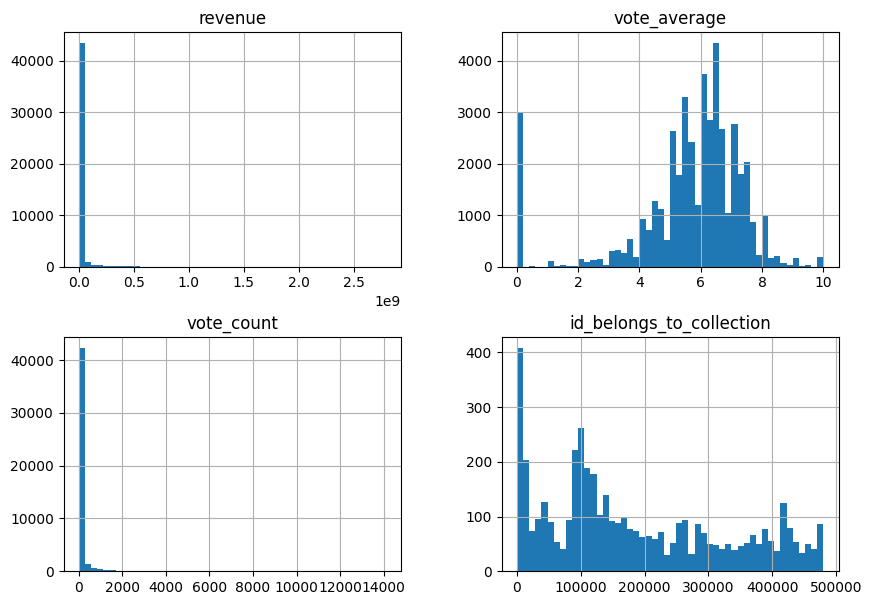

In [46]:
movies.hist(bins=50, figsize=(10, 7))
plt.show()

In [47]:
movies.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,name_belongs_to_collection,id_belongs_to_collection,poster_path_belongs_to_collection,backdrop_path_belongs_to_collection
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,[en],Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,10194.0,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,[en],Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN,NaN,NaN,NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,[en],Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpy Old Men Collection,119050.0,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,[en],Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,[en],Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Collection,96871.0,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg


In [48]:
movies = movies.drop(["belongs_to_collection"] ,axis=1)
movies.to_csv('CleanMoviesMetadata.csv', index=False)